##### portID feature

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
train_df = pd.read_csv("../data/original_data/ais_train.csv", sep="|")
schedules_df = pd.read_csv('../data/original_data/schedules_to_may_2024.csv', sep="|")
ports_df = pd.read_csv('../data/original_data/ports.csv', sep='|')

train_df.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3


In [12]:
unique_portIds_n_train = len(train_df["portId"].unique())
unique_portIds_n_schedules = len(schedules_df["portId"].unique())
unique_portIds_n_ports = len(ports_df["portId"].unique())


print(f"Unique port IDs train: {unique_portIds_n_train}")
print(f"Unique port IDs schedules: {unique_portIds_n_train}")
print(f"Unique port IDs ports: {unique_portIds_n_train}")

has_nan_train = train_df['portId'].isna().any()
print(f"NaN values in portId column in train_df: {has_nan_train}")
has_nan_schedules = schedules_df['portId'].isna().any()
print(f"NaN values in portId column in schedules_df: {has_nan_schedules}")
has_nan_ports = ports_df['portId'].isna().any()
print(f"NaN values in portId column in ports_df: {has_nan_ports}")

Unique port IDs train: 773
Unique port IDs schedules: 773
Unique port IDs ports: 773
NaN values in portId column in train_df: True
NaN values in portId column in schedules_df: True
NaN values in portId column in ports_df: False


In [13]:
# Remove rows with NaN in portId from train_df
train_df_cleaned = train_df.dropna(subset=['portId'])

# Remove rows with NaN in portId from schedules_df
schedules_df_cleaned = schedules_df.dropna(subset=['portId'])

# Remove rows with NaN in portId from ports_df
ports_df_cleaned = ports_df.dropna(subset=['portId'])

# Optionally, print the number of rows removed for each dataframe
print(f"Rows removed from train_df: {len(train_df) - len(train_df_cleaned)}/{len(train_df)}")
print(f"Rows removed from schedules_df: {len(schedules_df) - len(schedules_df_cleaned)}/{len(schedules_df)}")
print(f"Rows removed from ports_df: {len(ports_df) - len(ports_df_cleaned)}/{len(ports_df)}")

Rows removed from train_df: 1615/1522065
Rows removed from schedules_df: 4402/136250
Rows removed from ports_df: 0/1329


In [14]:
distinct_vesselIds = train_df["vesselId"].unique()

counter = 0

for vesselId in distinct_vesselIds:
    df = train_df[train_df["vesselId"] == vesselId]
    unique_portIds = df["portId"].unique()
    if len(unique_portIds) > 1:
        counter += 1

print(f"Unique vessels with more than one port ID: {counter}/{len(distinct_vesselIds)}")

Unique vessels with more than one port ID: 684/688


In [15]:
# The distribution of unique portId frequencies for one vesselId

frequencies = {}

for vesselId in distinct_vesselIds:
    df = train_df[train_df["vesselId"] == vesselId]
    unique_portIds_for_vessel = df["portId"].unique()
    unique_portIds_for_vessel_n = len(unique_portIds_for_vessel)
    freq_value = frequencies.get(unique_portIds_for_vessel_n)
    if freq_value == None:
        frequencies[unique_portIds_for_vessel_n] = 1
    else:
        frequencies[unique_portIds_for_vessel_n] += 1

print(frequencies)





{40: 16, 46: 6, 79: 4, 17: 12, 1: 4, 20: 15, 15: 10, 30: 18, 48: 8, 18: 5, 27: 9, 81: 5, 64: 4, 52: 6, 42: 11, 19: 12, 39: 13, 54: 6, 23: 22, 36: 21, 66: 9, 34: 14, 24: 15, 13: 12, 7: 2, 47: 10, 4: 4, 29: 19, 28: 12, 65: 7, 21: 18, 58: 5, 41: 11, 71: 5, 76: 3, 72: 6, 9: 7, 37: 16, 11: 10, 77: 5, 16: 9, 84: 1, 60: 5, 63: 4, 44: 10, 31: 8, 2: 4, 45: 10, 33: 21, 25: 16, 14: 4, 70: 8, 53: 4, 83: 4, 55: 5, 38: 9, 74: 2, 35: 17, 78: 4, 49: 5, 61: 5, 93: 1, 26: 13, 32: 16, 57: 5, 3: 2, 94: 1, 73: 3, 87: 3, 59: 3, 22: 14, 62: 5, 50: 4, 8: 5, 68: 8, 75: 6, 82: 3, 5: 3, 56: 6, 43: 6, 88: 1, 69: 6, 67: 3, 85: 4, 51: 3, 91: 2, 12: 4, 96: 1, 80: 1, 101: 1, 90: 1, 10: 1, 6: 1}


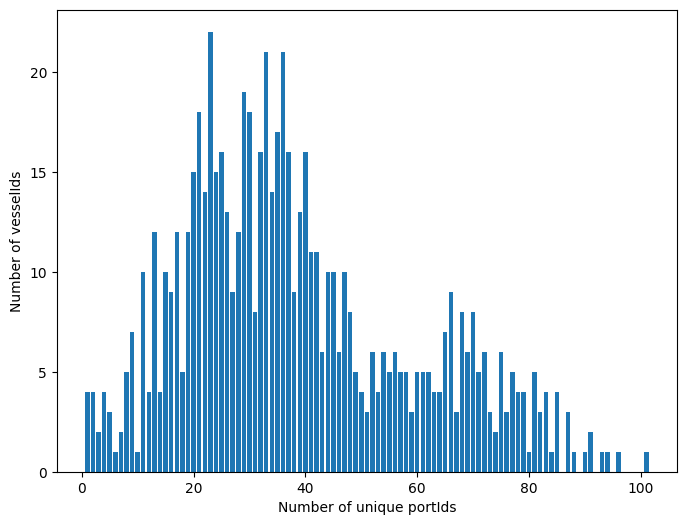

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(x=frequencies.keys(), height=frequencies.values())

# Add labels and title
plt.xlabel('Number of unique portIds')
plt.ylabel('Number of vesselIds')

# Show the plot
plt.show()